In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
import seaborn as sns


# 1. Preprocessing

# import the data and convert it to dataframe

In [2]:
df= read_csv('arrhythmia.data',names=("Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","Class"))


df = df.replace('?',np.nan)

In [3]:
df.head().transpose()

,0,1,2,3,4
Age,75,56,54,55,75
Sex,0,1,0,0,0
Height,190,165,172,175,190
Weight,80,64,95,94,80
QRS_Dur,91,81,138,100,88
...,...,...,...,...,...
V6276,0.9,0.2,0.3,0.4,-0.1
V6277,2.9,2.1,3.4,2.6,3.9
V6278,23.3,20.4,12.3,34.6,25.4
V6279,49.4,38.8,49.0,61.6,62.8


In [4]:
df.shape

(452, 280)

In [5]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


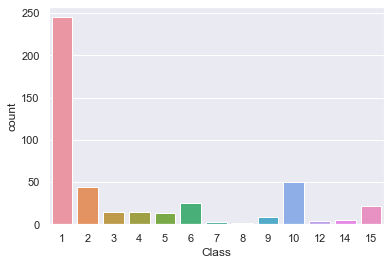

In [6]:
sns.set()
df["Class"] = df["Class"].astype(int)
class_count=sns.countplot(x="Class", data=df)
plt.gca().set_xticklabels(['1','2' ,'3' ,'4', '5' , '6' ,'7','8' ,'9' ,'10'  ,'12' , '14', '15']);

class_count.figure.savefig('class.png')

# identifiying missing values

In [7]:
df.isna().sum().sum()

408

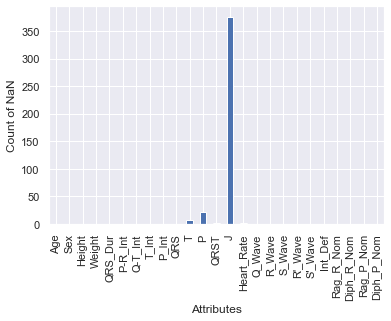

In [8]:
pd.isnull(df).sum()[0:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN');

In [9]:
df.dropna(thresh=0.5*len(df),axis=1,inplace=True)
df.shape

(452, 279)

In [10]:
df.isna().sum().sum()

32

# get the numeric columns and fill the missing values

In [11]:
df= df.fillna(df.mean().iloc[0])

df.isna().sum().sum()

0

# Normalize the scale

In [12]:
sc=MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop('Class', axis=1)),columns = (df.drop('Class', axis=1)).columns)

# PCA

In [13]:
pca = PCA(n_components=16)
pca.fit(df_scaled)
data = pca.transform(df_scaled)

# 2. visualization

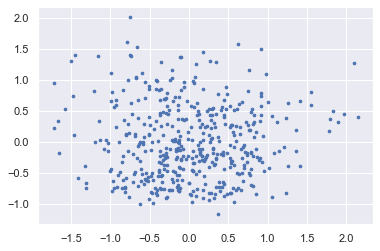

In [14]:
plt.scatter(data[:,0],data[:,1],s=7)
plt.show()

# 3. kmeans

In [15]:
silhouette_coefficients =[]
randed_score=[]

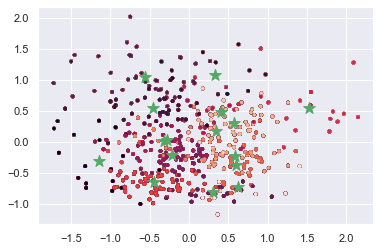

In [100]:
for i in range(31):
        
    km=KMeans(n_clusters=16, init ='random').fit(data)
    y_kmeans = km.fit_predict(data)
    
    #silhouetter score
    sil_score =silhouette_score(df_scaled, km.labels_) 
    silhouette_coefficients.append(sil_score)

    
    #RAND SCORE
    rn_score = rand_score(df['Class'].to_numpy (),km.labels_)
    randed_score.append(rn_score)

    #visualisation clusters
    plt.scatter(data[:,0],data[:,1],s=7,c=km.labels_)

    
for i in range(16): 
    plt.scatter(km.cluster_centers_[i,0], km.cluster_centers_[i,1], marker='*', c='g', s=150)



In [101]:
np.max(randed_score)

0.6697113592213959

In [102]:
X1 = np.std(randed_score)
X2 = np.max(randed_score)
X3 = np.min(randed_score)
X4 = np.mean(randed_score)

In [103]:
np.min(silhouette_coefficients)

0.03737889987141814

In [104]:
Y1 = np.std(silhouette_coefficients)
Y2 = np.max(silhouette_coefficients)
Y3 = np.min(silhouette_coefficients)
Y4 = np.mean(silhouette_coefficients)

# 4. Generate Excel file 

In [106]:
path = r"C:\Users\MAXFRAME\Desktop\DamiExcel\dataArryth.xlsx"
dami={'rand_score':[X1,X2,X3,X4],'silhouette_coefficients':[Y1,Y2,Y3,Y4]}

df1 = pd.DataFrame(dami,index=['std','max','min', 'mean'])

writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

df1.to_excel(writer)

writer.save()
writer.close()